In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy import stats

In [5]:
mu, sigma = 0, 1 # mean and standard deviation
s = np.random.normal(mu, sigma, 1)
s[0]

s = stats.norm([10],[2])
s.pdf(10)[0]
s.rvs()

10.231805075429282

In [6]:
#We want to find expected value of a set of samples fron a distribution
def expected_value_sampling(samples):
    return (1/len(samples))*sum([s for s in samples])

In [7]:
#Test for calculating expected value of samples of normal ditribution

mu, sigma = 10, 1 # mean and standard deviation
N_sizes = [100,200,500,1000,2000,100000]
for N in (N_sizes):
    distribution = stats.norm([mu],[sigma])
    s = distribution.rvs(N)
    print(expected_value_sampling(s))

9.903431346887615
9.909794492854024
10.037772170281237
9.986805271888365
9.967509251780196
9.996397777421148


## 1.1 - Implementation of the Metropolis Hastings Algorithm

In [8]:
def proposed_density_random_walk(u_t, beta):
    return stats.norm([u_t],[beta**2])

In [9]:
def MH_A_1D(beta,N,proposed_density):
    """
    Implementation of Metropolis Hastings Algorithm for 1D distributions.
    
    1. Choose u(1) with π(u(1))>0.
    2. At state u(t), sample a proposal u′ from density q(u′|u(t)).
    3. Accept sample u′ with probability:
        α(u′|u(i)) = min(1,π(u′)q(u(t)|u′)/π(u(i))q(u′|u(t))).
        
    Inputs:
    beta (float) = beta used in random walk proposed density
    N (Int) = Number of steps taken in algorthim
    
    """
    # initalize
    u_0 = 0 
    u_t = 0
    posterior_distribution_pi = stats.norm([10],[1])
    proposed_density = proposed_density
    u_samples = [u_0]
    list_acceptance_probaility = []
    
    # ?Methods of getting the best beta?
    # Some cases theory; normal distribution we can calculte it -> Average acceptance rate 0.234.
    beta = beta
    
    for t in range(N):
        
        # sample a proposal u′ from density q(u′|u(t)) 
        proposal_density_t = proposed_density(u_t,beta)
        u_prime = proposal_density_t.rvs()
        
        #?Ask about proposed density for u prime?
        # proposal density q(u(t)|u′) used in (3)
        proposal_density_prime = proposed_density(u_prime,beta)
        
        # π(u′)q(u(t)|u′)
        numerator = posterior_distribution_pi.pdf(u_prime)*proposal_density_prime.pdf(u_t)
        # π(u(t))q(u′|u(t))
        denominator = posterior_distribution_pi.pdf(u_t)*proposal_density_t.pdf(u_prime)
        
        acceptance_probaility = float(min([1,numerator/denominator]))
        list_acceptance_probaility.append(acceptance_probaility)
        
        rv = np.random.uniform(0,1,1)
        
        if rv <= acceptance_probaility:
            #Accept
            u_t = u_prime
            u_samples.append(u_t)
        else:
            #Reject
            u_t = u_t
    
    #?Buring what percentage of samples?
    #Burn first 20 percent of samples because we pick a random u_0 which could be very far from where we want to sample from
    return u_samples , list_acceptance_probaility

In [10]:
expected_value_sampling(MH_A_1D(0.9,1000,proposed_density_random_walk)[0])
MH_A_1D(1,1000,proposed_density_random_walk)[0]

[0,
 0.7084761618296884,
 1.5321747512036217,
 1.9749798489865484,
 2.372139970982343,
 3.6535019957648434,
 4.971868556848265,
 5.36706834598366,
 4.948808364843442,
 5.566190108128732,
 5.909263887923217,
 6.754091283912209,
 7.11820873093114,
 7.266228621590183,
 7.955538259518705,
 8.007460342870283,
 9.38103038336478,
 9.470895701631026,
 9.328177184336349,
 9.559029964218428,
 9.288331525995746,
 11.19720734010129,
 10.213540112463308,
 10.520688764574679,
 11.517166995982524,
 11.344020147392563,
 12.4418159646323,
 10.388183379546225,
 10.551377558753817,
 9.49161998249134,
 9.42353770747086,
 10.219945691108869,
 9.620367389399783,
 8.675713828793036,
 9.01217510836657,
 11.025510413598468,
 11.73903120461122,
 11.776441166251782,
 11.528257241869952,
 11.414577597035848,
 10.922851891968804,
 10.129753489437073,
 10.407092848215665,
 9.925040267457913,
 9.519686193576495,
 10.596447222574655,
 10.590458916848819,
 10.481835959872232,
 11.547788696347439,
 11.17296215756125,
 

In [11]:
#Get the value of x evaluated at the pdf 
def pdf_distribution(distribution, x):
    return distribution.pdf(x)[0]

## 1.2 - Finding the best beta for our problem

In [12]:
# (1) Investigate -> average acceptance probability to determine beta

beta_s = [x/10 for x in range(101)]
list_a_p = []
N = 1000 

for beta in beta_s:
    average_acceptance_probabity = expected_value_sampling(MH_A_1D(beta,N,proposed_density_random_walk)[1])
    list_a_p.append(average_acceptance_probabity)
    

/Users/lorenzostigliano/Documents/University/4th_Year/Maths_Project/Notebook/env/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: invalid value encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


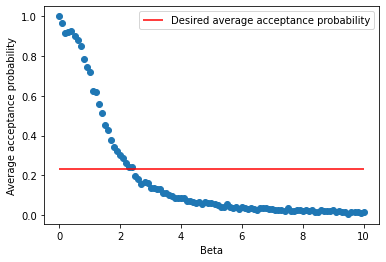

In [13]:
fig, ax = plt.subplots()
plt.scatter(beta_s,list_a_p)
ax.hlines(.234, 0, 10, "r",label = "Desired average acceptance probability")
ax.set_ylabel('Average acceptance probability')
ax.set_xlabel('Beta')
ax.legend()


In [68]:
# Get value of beta that is closest to alpha = 0.234

diff = 10
index = 0 

for i in range(len(list_a_p)):
    if diff > abs(list_a_p[i]-0.234):
        diff = abs(list_a_p[i]-0.234)
        index = i 

print("Index of beta:{}, Beta value:{}, Value of alpha at this value of Beta:{}".format(index, beta_s[index], list_a_p[index]))

Index of beta:23, Beta value:2.3, Value of alpha at this value of Beta:0.2340504238327008


From this analysis the best beta value to use, in this case with Normal Distribution (10,1), is **beta = 2.1** since average alpha = 0.248 which is the closest to alpha = 0.234 our desired value. *Note that (alpha = average acceptance probability)*

## 1.3 - Autocorreltation function to see how correlated our samples. This is for our estimator in our case the mean of the samples

In [ ]:

    def covariance_between_elements_NOTCORRRECT(self):
        """
        Input: Takes in a list of samples, that where produced by MCMC method.
        Returns: A list of Cov(u_j,u_i) for all differences of j-i up to n

        Note: Cov(u_i,u_j) = Cov(u_i+1,u_j+1), we use this property of markov chains since samples are independant of
        one another.
        """

        n = self.N
        u_mean = np.mean(self.list_samples)

        # 1/L where L is the number of comparisons L = N-1,N-2,...,1
        L = [i for i in range(n-1,0,-1)]

        return [(1/L[x-1]-1)*sum([(self.list_samples[0+i]-u_mean)*(self.list_samples[x+i]-u_mean) for i in range(n) if x+i < n]) for x in range(1,n)]

    #Asymptotic variance for different values of N and using our optimal beta
    def asymptotic_variance_NOTCORRECT(self):
        """
        Asymptotic variance = Var(U_0) + 2*sum(Cov(U_0,U_i))
        Note that U_i's are sampled from the posterior distribution pi we are trying to model.

        This is the asymptotic variance of the value of our estimator, in our case the mean of samples.
        """
        n = self.N
        u_0 = self.list_samples[0]

        u_variance = np.var(self.list_samples)
        cov_elementwise = self.covariance_between_elements()

        return u_variance + 2*sum(cov_elementwise)

In [69]:
def covariance_between_elements(list_samples):
    """
    Input: Takes in a list of samples, that where produced by MCMC method.
    Returns: A list of Cov(u_j,u_i) for all differences of j-i up to n
    
    Note: Cov(u_i,u_j) = Cov(u_i+1,u_j+1), we use this property of markov chains since samples are independant of
    of another.
    
    """
    
    n = len(list_samples)
    u_mean = np.mean(list_samples)
    
    # 1/L where L is the number of comparisons L = N-1,N-2,...,1
    L = [i for i in range(n-1,0,-1)]
    
    return [(1/L[x-1]-1)*sum([(list_samples[0+i]-u_mean)*(list_samples[x+i]-u_mean) for i in range(n) if x+i < n]) for x in range(1,n)]

In [70]:
#Asymptotic variance for different values of N and using our optimal beta
def asymptotic_variance(list_samples):
    """
    Asymptotic variance = Var(U_0) + 2*sum(Cov(U_0,U_i))
    Note that U_i's are sampled from the posterior distribution pi we are trying to model.
    
    This is the asymptotic variance of the value of our estimator, in our case the mean of samples.
    """
    n = len(list_samples)
    u_0 = list_samples[0]
        
    u_variance = np.var(list_samples)
    cov_elementwise = covariance_between_elements(list_samples)
    
    return u_variance + 2*sum(cov_elementwise)

In [71]:
N_s = [i for i in range(100,4000,100)]
variances = []

for N in N_s:
    asymp_var = asymptotic_variance(MH_A_1D(2.1,N,proposed_density_random_walk)[0])
    var_estimator = asymp_var/N
    variances.append(var_estimator)

Text(0.5, 0, 'Number of samples')

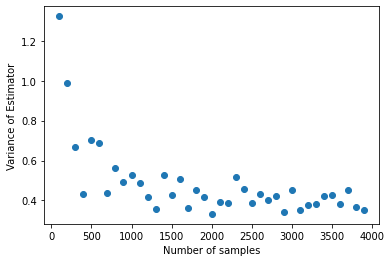

In [72]:
fig, ax = plt.subplots()
plt.scatter(N_s,variances)

ax.set_ylabel('Variance of Estimator')
ax.set_xlabel('Number of samples')

$Asymptioic Var/N$ is the variance of the estimator $1/n*\sum\limits_{i=1}^n u^i$, in our case the mean of samples so as we can see from above the more samples points we get the better the variance.

## 1.4 Finding Burn-in by ploting samples sample against sample number

In [16]:
samples = MH_A_1D(2.1,1000,proposed_density_random_walk)[0]

In [17]:
sample_index = [i for i in range(len(samples))]

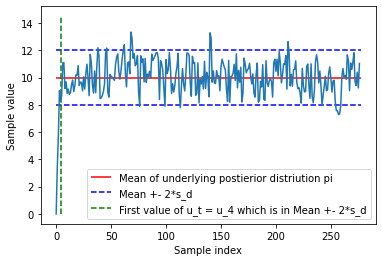

In [18]:
fig, ax = plt.subplots()
plt.plot(sample_index,samples)
mean = 10
s_d = 1
index = 0 

ax.hlines(mean, 0, len(samples), "r",label = "Mean of underlying postierior distriution pi")
ax.hlines(mean-2*s_d, 0, len(samples), "b",'--',label = "Mean +- 2*s_d")
ax.hlines(mean+2*s_d, 0, len(samples), "b",'--')

for u in samples:
    index+=1
    if(u > mean-2*s_d):
        break

ax.vlines(index, 0, 14.5, "g",'--',label = "First value of u_t = u_{} which is in Mean +- 2*s_d".format(index))
ax.set_ylabel('Sample value')
ax.set_xlabel('Sample index')
ax.legend()

Thus we would burn the all the samples until the first one that falls within our range in this case it our first sample we wouold use would be u_4

## 1.5 Try with new functions: 2D-Gaussians, Mixture Gaussians, Rosenbrook function

### 1.5.1 Mixture Gaussians

In [37]:
def gaussian_mixture_pdf(x, pi_s):
    """
    pi_s is a list of normal distributions made with stats.norm([mu],[sigma])
    x is the value we want to evaluate
    """
    return sum([pi.pdf(x) for pi in pi_s])

array([0.39894228])

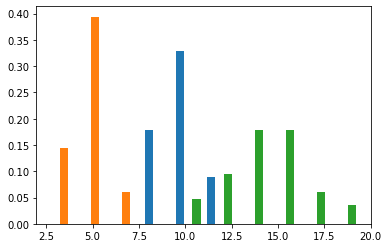

In [38]:
pi_1 = stats.norm([10],[1])
pi_2 = stats.norm([5],[1])
pi_3 = stats.norm([14],[2])

x1_s = pi_1.rvs(100)
x2_s = pi_2.rvs(100)
x3_s = pi_3.rvs(100)

x = [x1_s]+[x2_s]+[x3_s]

fig, ax = plt.subplots()
plt.hist(x,density=True)

pi_1.pdf(10)

In [39]:
def MH_A_MixGauss(beta, N, gaussian_posterior):
    """
    Implementation of Metropolis Hastings Algorithm for mixture gaussians.
        
    Inputs:
    beta (float) = beta used in random walk proposed density
    N (Int) = Number of steps taken in algorthim
    gaussian_posterior (List) = list of normal distributions made with stats.norm([mu],[sigma])
    
    """
    # initalize
    u_0 = 0 
    u_t = 0
    posterior_distribution_pi = gaussian_posterior
    u_samples = [u_0]
    list_acceptance_probaility = []
    
    # ?Methods of getting the best beta?
    # Some cases theory; normal distribution we can calculte it -> Average acceptance rate 0.234.
    beta = beta
    
    for t in range(N):
        
        # sample a proposal u′ from density q(u′|u(t)) 
        proposal_density_t = proposed_density_random_walk(u_t,beta)
        u_prime = proposal_density_t.rvs()
        
        #?Ask about proposed density for u prime?
        # proposal density q(u(t)|u′) used in (3)
        proposal_density_prime = proposed_density_random_walk(u_prime,beta)
        
        # π(u′)q(u(t)|u′)
        numerator = gaussian_mixture_pdf(u_prime,gaussian_posterior)*proposal_density_prime.pdf(u_t)
        # π(u(t))q(u′|u(t))
        denominator = gaussian_mixture_pdf(u_t,gaussian_posterior)*proposal_density_t.pdf(u_prime)
        
        acceptance_probaility = float(min([1,numerator/denominator]))
        list_acceptance_probaility.append(acceptance_probaility)
        
        rv = np.random.uniform(0,1,1)
        
        if rv <= acceptance_probaility:
            #Accept
            u_t = u_prime
            u_samples.append(u_t)
        else:
            #Reject
            u_t = u_t
    
    #?Buring what percentage of samples?
    #Burn first 20 percent of samples because we pick a random u_0 which could be very far from where we want to sample from
    return u_samples , list_acceptance_probaility

In [40]:
samples = MH_A_MixGauss(0.21,5000,[pi_1,pi_2])[0]

In [41]:
len(samples)

4907

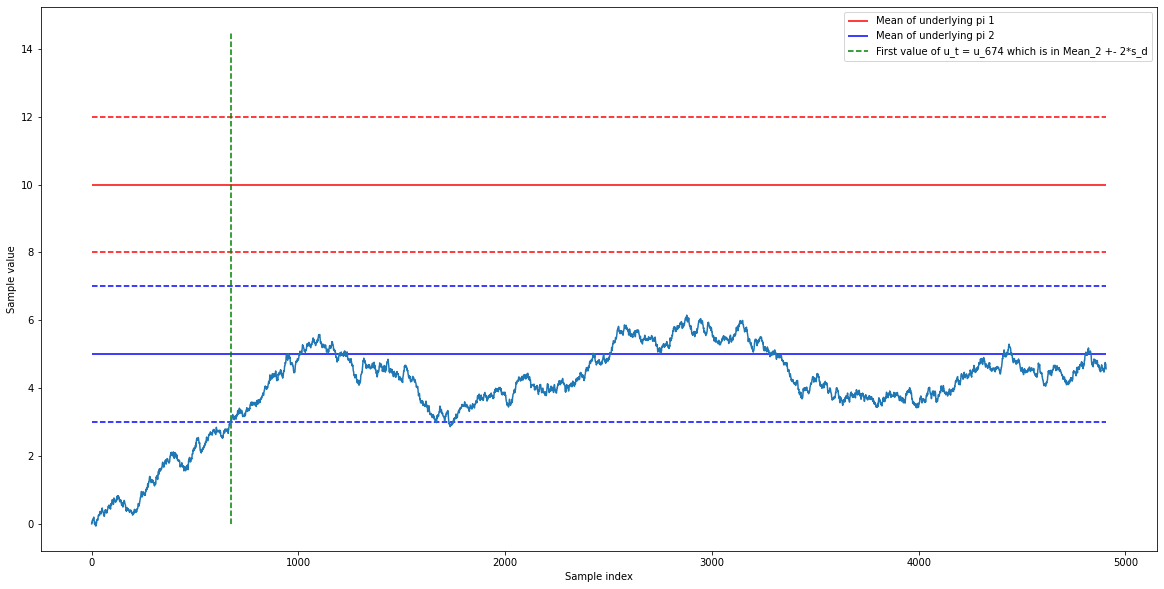

In [42]:
sample_index = [i for i in range(len(samples))]
fig, ax = plt.subplots(figsize=(20, 10))
ax.plot(sample_index,samples)

mean_1, mean_2 = 10, 5
s_d = 1
index = 0 

ax.hlines(mean_1, 0, len(samples), "r",label = "Mean of underlying pi 1")
ax.hlines(mean_1-2*s_d, 0, len(samples), "r",'--')
ax.hlines(mean_1+2*s_d, 0, len(samples), "r",'--')

ax.hlines(mean_2, 0, len(samples), "b",label = "Mean of underlying pi 2")
ax.hlines(mean_2-2*s_d, 0, len(samples), "b",'--') 
ax.hlines(mean_2+2*s_d, 0, len(samples), "b",'--')

for u in samples:
    index+=1
    if(u > mean_1-2*s_d or u > mean_2-2*s_d):
        break

ax.vlines(index, 0, 14.5, "g",'--',label = "First value of u_t = u_{} which is in Mean_2 +- 2*s_d".format(index))
ax.set_ylabel('Sample value')
ax.set_xlabel('Sample index')
ax.legend()

### 1.5.2 2D-Gaussians

In [105]:
test = stats.multivariate_normal([10,5],[[1,0],[0,1]])
test.rvs(10)
test.pdf([10,2])
test.pdf(test.rvs(1))

0.11695683939996171

In [106]:
def proposed_density_random_walk_2d(u_t, beta):
    return stats.multivariate_normal([int(u_t[0]),int(u_t[1])],[[beta**2,0],[0,beta**2]])

In [107]:
def MH_A_2D(beta, N):
    """
    Implementation of Metropolis Hastings Algorithm with random walk proposed density.
    
    1. Choose u(1) with π(u(1))>0.
    2. At state u(t), sample a proposal u′ from density q(u′|u(t)).
    3. Accept sample u′ with probability:
        α(u′|u(i)) = min(1,π(u′)q(u(t)|u′)/π(u(i))q(u′|u(t))).
        
    Inputs:
    beta (float) = beta used in random walk proposed density
    N (Int) = Number of steps taken in algorthim
    
    """
    # initalize
    u_0 = [0,0] 
    u_t = [0,0]
    posterior_distribution_pi = stats.multivariate_normal([10,5],[[1,0],[0,1]])
    u_samples = [u_0]
    all_samples = [u_0]
    list_acceptance_probaility = []
    
    # ?Methods of getting the best beta?
    # Some cases theory; normal distribution we can calculte it -> Average acceptance rate 0.234.
    beta = beta
    
    for t in range(N):
        
        # sample a proposal u′ from density q(u′|u(t)) 
        proposal_density_t = proposed_density_random_walk_2d(u_t,beta)
        u_prime = proposal_density_t.rvs()
        
        #?Ask about proposed density for u prime?
        # proposal density q(u(t)|u′) used in (3)
        proposal_density_prime = proposed_density_random_walk_2d(u_prime,beta)
        
        # π(u′)q(u(t)|u′)
        numerator = posterior_distribution_pi.pdf(u_prime)*proposal_density_prime.pdf(u_t)
        # π(u(t))q(u′|u(t))
        denominator = posterior_distribution_pi.pdf(u_t)*proposal_density_t.pdf(u_prime)
        
        acceptance_probaility = float(min([1,numerator/denominator]))
        list_acceptance_probaility.append(acceptance_probaility)
        
        rv = np.random.uniform(0,1,1)
        
        if rv <= acceptance_probaility:
            #Accept
            u_t = u_prime
            u_samples.append(u_t)
            all_samples.append(u_t)
        else:
            #Reject
            u_t = u_t
            all_samples.append(u_prime)
    
    #?Buring what percentage of samples?
    #Burn first 20 percent of samples because we pick a random u_0 which could be very far from where we want to sample from
    return u_samples, all_samples, list_acceptance_probaility

In [108]:
run = MH_A_2D(0.51,5000)
samples = run[0]
all_samples = run[1]
print(len(samples))
print(len(all_samples))

834
5001


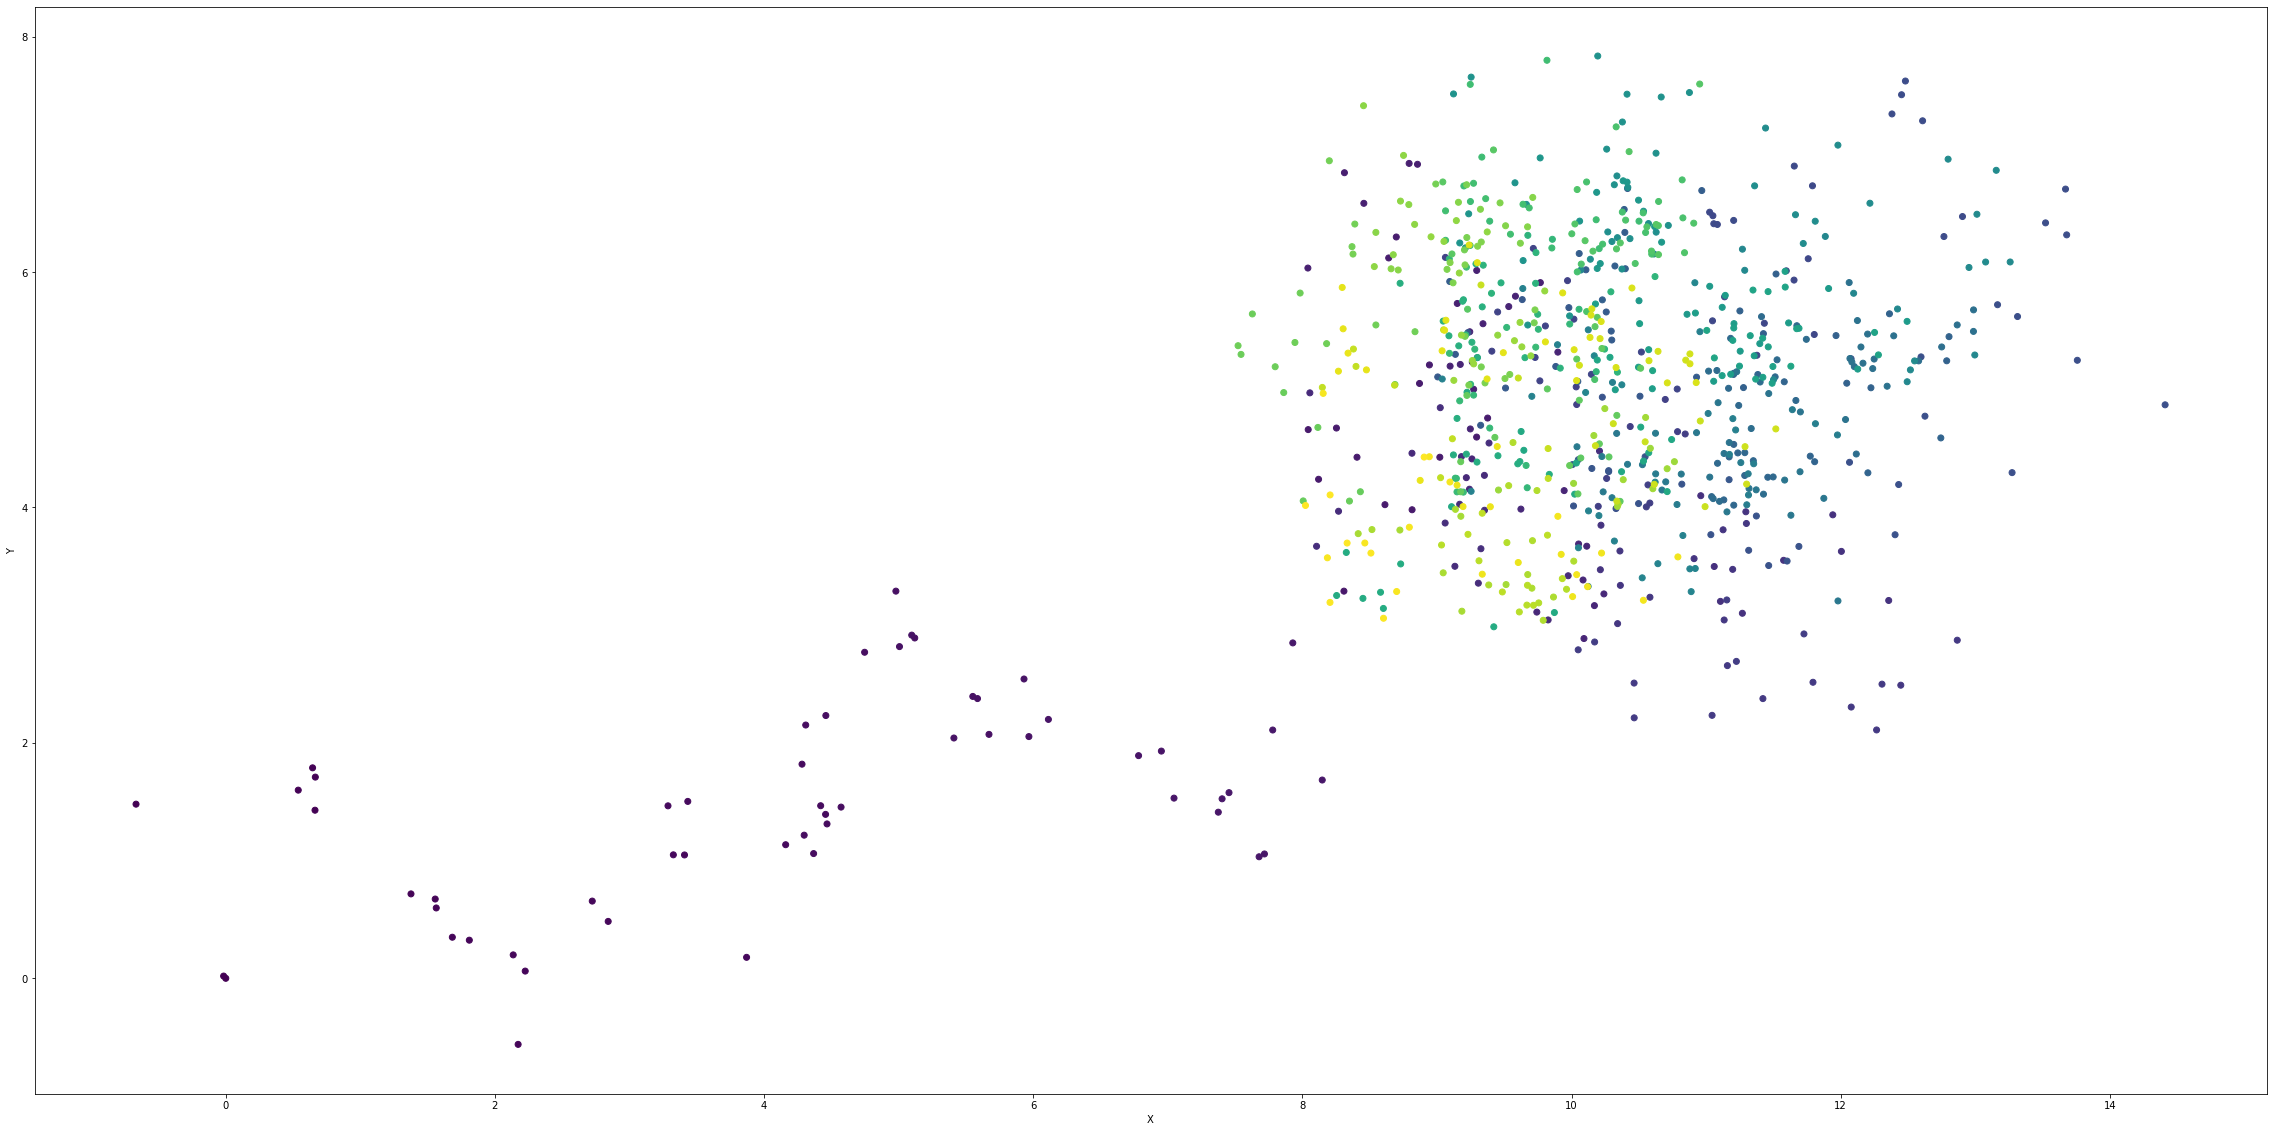

In [109]:
x = [s[0] for s in samples]
y = [s[1] for s in samples]
sample_index = [i for i in range(len(samples))]

fig, ax = plt.subplots(figsize=(40, 20))
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.scatter(x,y,c=sample_index)

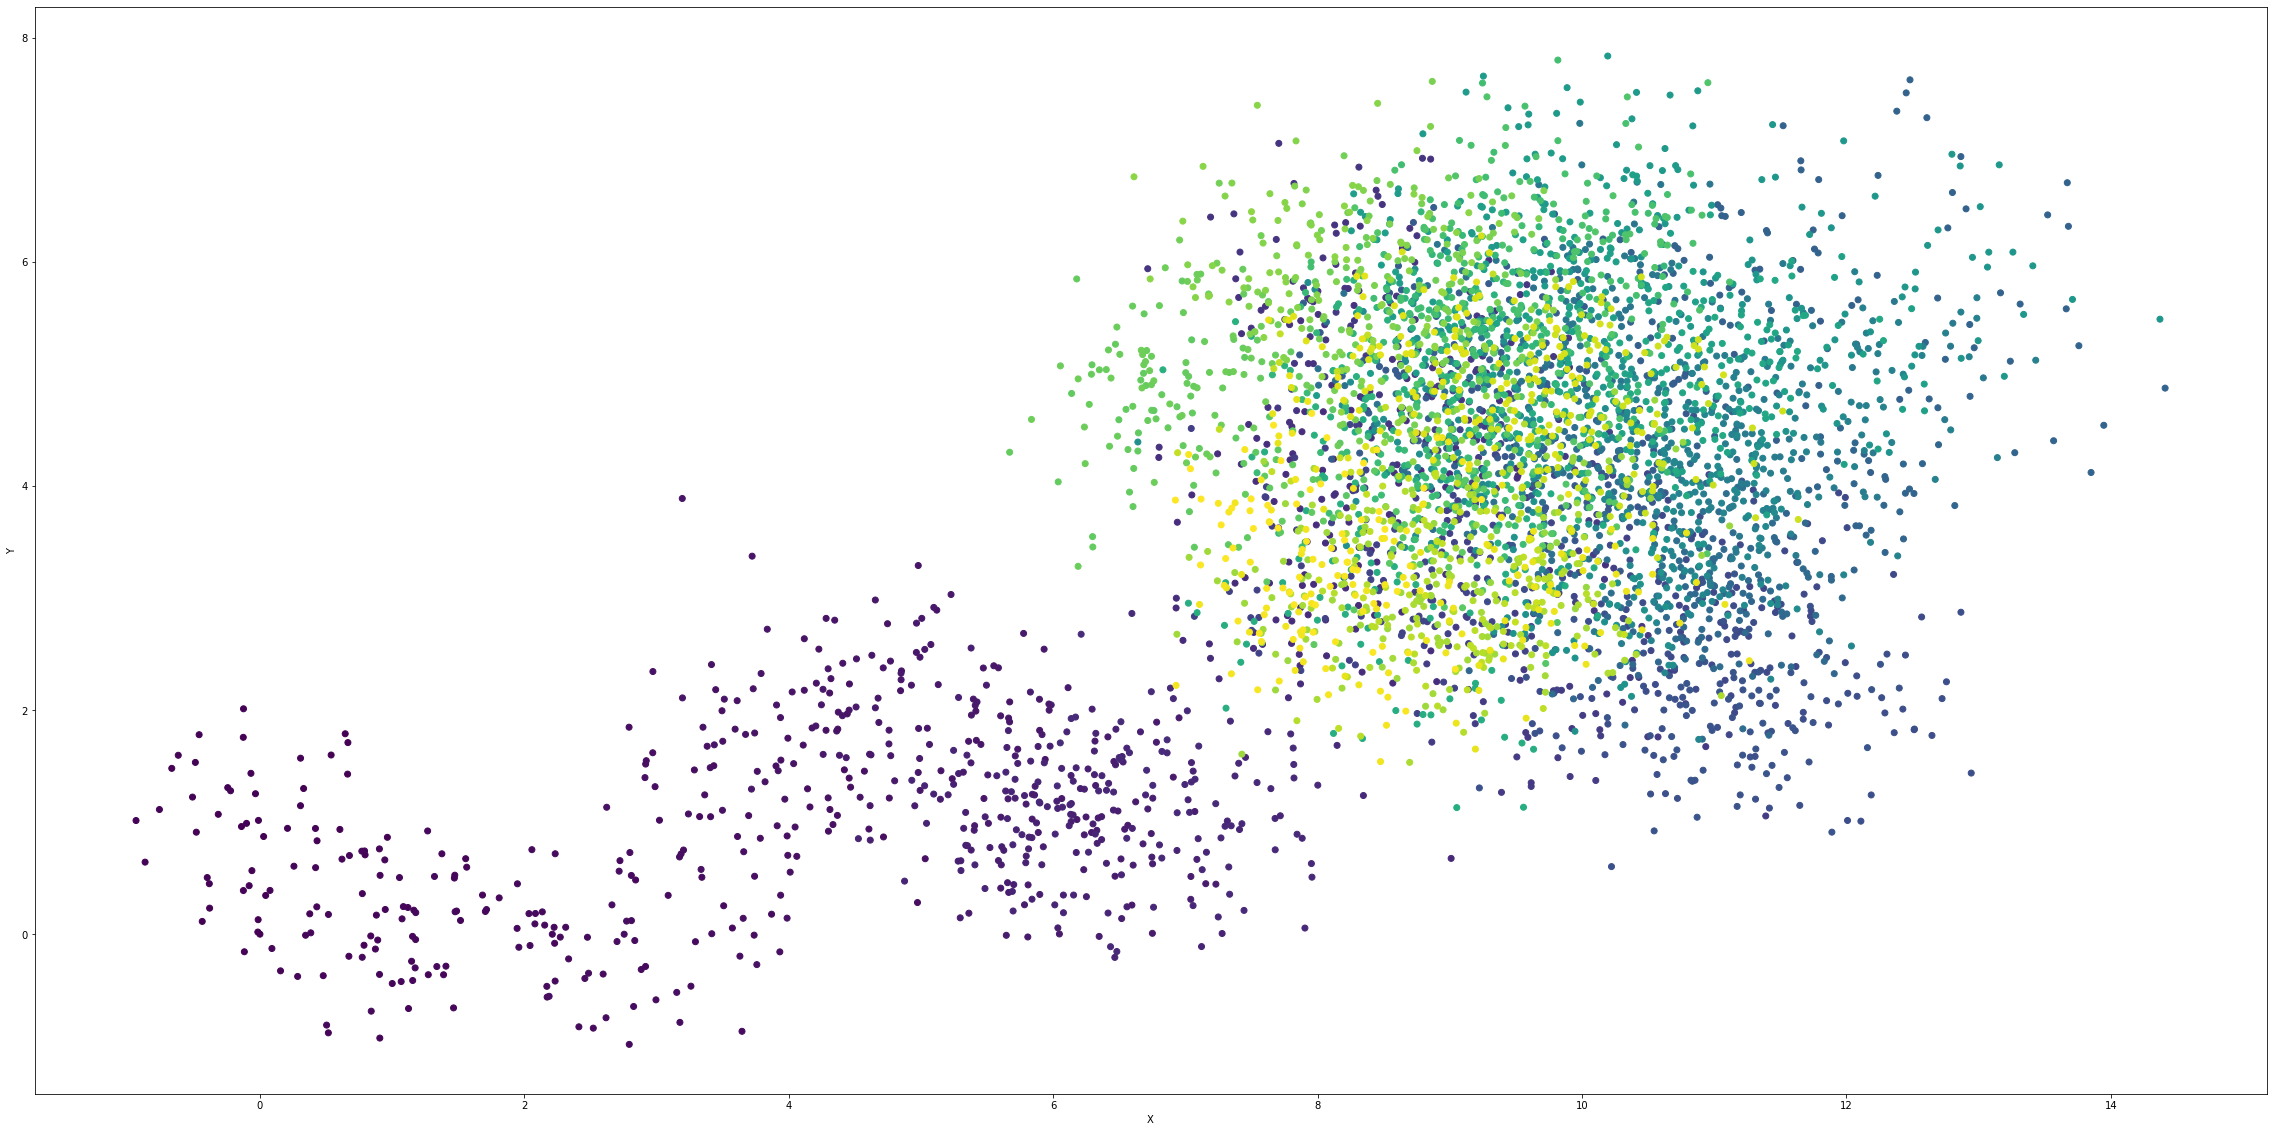

In [110]:
x_all = [s[0] for s in all_samples]
y_all = [s[1] for s in all_samples]
sample_index = [i for i in range(len(all_samples))]

ax.clear()
fig, ax = plt.subplots(figsize=(40, 20))
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.scatter(x_all,y_all,c = sample_index)

### 1.5.3 Rosenbrook function

https://arxiv.org/pdf/1903.09556.pdf

In [141]:
def pdf_rb(x):
    a = (x[1]-(x[0]**2))**2
    b = (1-x[1])**2
    return np.exp(-100*(a+b)/10)

In [111]:
def MH_A_RB(beta, N, pdf_rb, u_0):
    """
    Implementation of Metropolis Hastings Algorithm for rosenbrook function.
    
    1. Choose u(1) with π(u(1))>0.
    2. At state u(t), sample a proposal u′ from density q(u′|u(t)).
    3. Accept sample u′ with probability:
        α(u′|u(i)) = min(1,π(u′)q(u(t)|u′)/π(u(i))q(u′|u(t))).
        
    Inputs:
    beta (float) = beta used in random walk proposed density
    N (Int) = Number of steps taken in algorthim
    
    """
    # initalize
    u_t = u_0
    posterior_distribution_pi = pdf_rb
    u_samples = [u_t]
    all_samples = [u_t]
    list_acceptance_probaility = []
    
    # ?Methods of getting the best beta?
    # Some cases theory; normal distribution we can calculte it -> Average acceptance rate 0.234.
    beta = beta
    
    for t in range(N):
        
        # sample a proposal u′ from density q(u′|u(t)) 
        proposal_density_t = proposed_density_random_walk_2d(u_t,beta)
        u_prime = proposal_density_t.rvs()
        
        #?Ask about proposed density for u prime?
        # proposal density q(u(t)|u′) used in (3)
        proposal_density_prime = proposed_density_random_walk_2d(u_prime,beta)
        
        # π(u′)q(u(t)|u′)
        numerator = pdf_rb(u_prime)*proposal_density_prime.pdf(u_t)
        # π(u(t))q(u′|u(t))
        denominator = pdf_rb(u_t)*proposal_density_t.pdf(u_prime)
        
        acceptance_probaility = float(min([1,numerator/denominator]))
        list_acceptance_probaility.append(acceptance_probaility)
        
        rv = np.random.uniform(0,1,1)
        
        if rv <= acceptance_probaility:
            #Accept
            u_t = u_prime
            u_samples.append(u_t)
            all_samples.append(u_t)
        else:
            #Reject
            u_t = u_t
            all_samples.append(u_prime)
    
    #?Buring what percentage of samples?
    #Burn first 20 percent of samples because we pick a random u_0 which could be very far from where we want to sample from
    return u_samples , all_samples, list_acceptance_probaility

In [129]:
# Exploring rosenbrook for best value of beta
beta_s = [(x+0.1)/10 for x in range(101)]
list_a_p = []
N = 1000 

for beta in beta_s:
    average_acceptance_probabity = expected_value_sampling(MH_A_RB(beta,2000,pdf_rb,(-10,0))[2])
    list_a_p.append(average_acceptance_probabity)


<ipython-input-111-16aa9d607bfd>:41: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_probaility = float(min([1,numerator/denominator]))
<ipython-input-111-16aa9d607bfd>:41: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_probaility = float(min([1,numerator/denominator]))


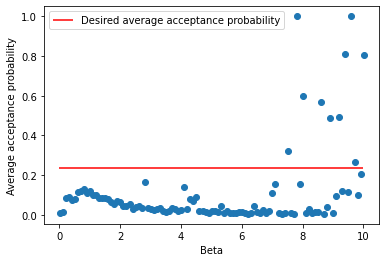

In [130]:
fig, ax = plt.subplots()
plt.scatter(beta_s,list_a_p)
ax.hlines(.234, 0, 10, "r",label = "Desired average acceptance probability")
ax.set_ylabel('Average acceptance probability')
ax.set_xlabel('Beta')
ax.legend()

In [131]:
# Get value of beta that is closest to alpha = 0.234

diff = 10
index = 0 

for i in range(len(list_a_p)):
    if diff > abs(list_a_p[i]-0.234):
        diff = abs(list_a_p[i]-0.234)
        index = i 

print("Index of beta:{}, Beta value:{}, Value of alpha at this value of Beta:{}".format(index, beta_s[index], list_a_p[index]))

Index of beta:99, Beta value:9.91, Value of alpha at this value of Beta:0.20480362789110265


In [158]:
run = MH_A_RB(1.7,5000,pdf_rb,(-10,0))
samples = run[0]
all_samples = run[1]

<ipython-input-111-16aa9d607bfd>:41: RuntimeWarning: invalid value encountered in double_scalars
  acceptance_probaility = float(min([1,numerator/denominator]))
<ipython-input-111-16aa9d607bfd>:41: RuntimeWarning: divide by zero encountered in double_scalars
  acceptance_probaility = float(min([1,numerator/denominator]))


176


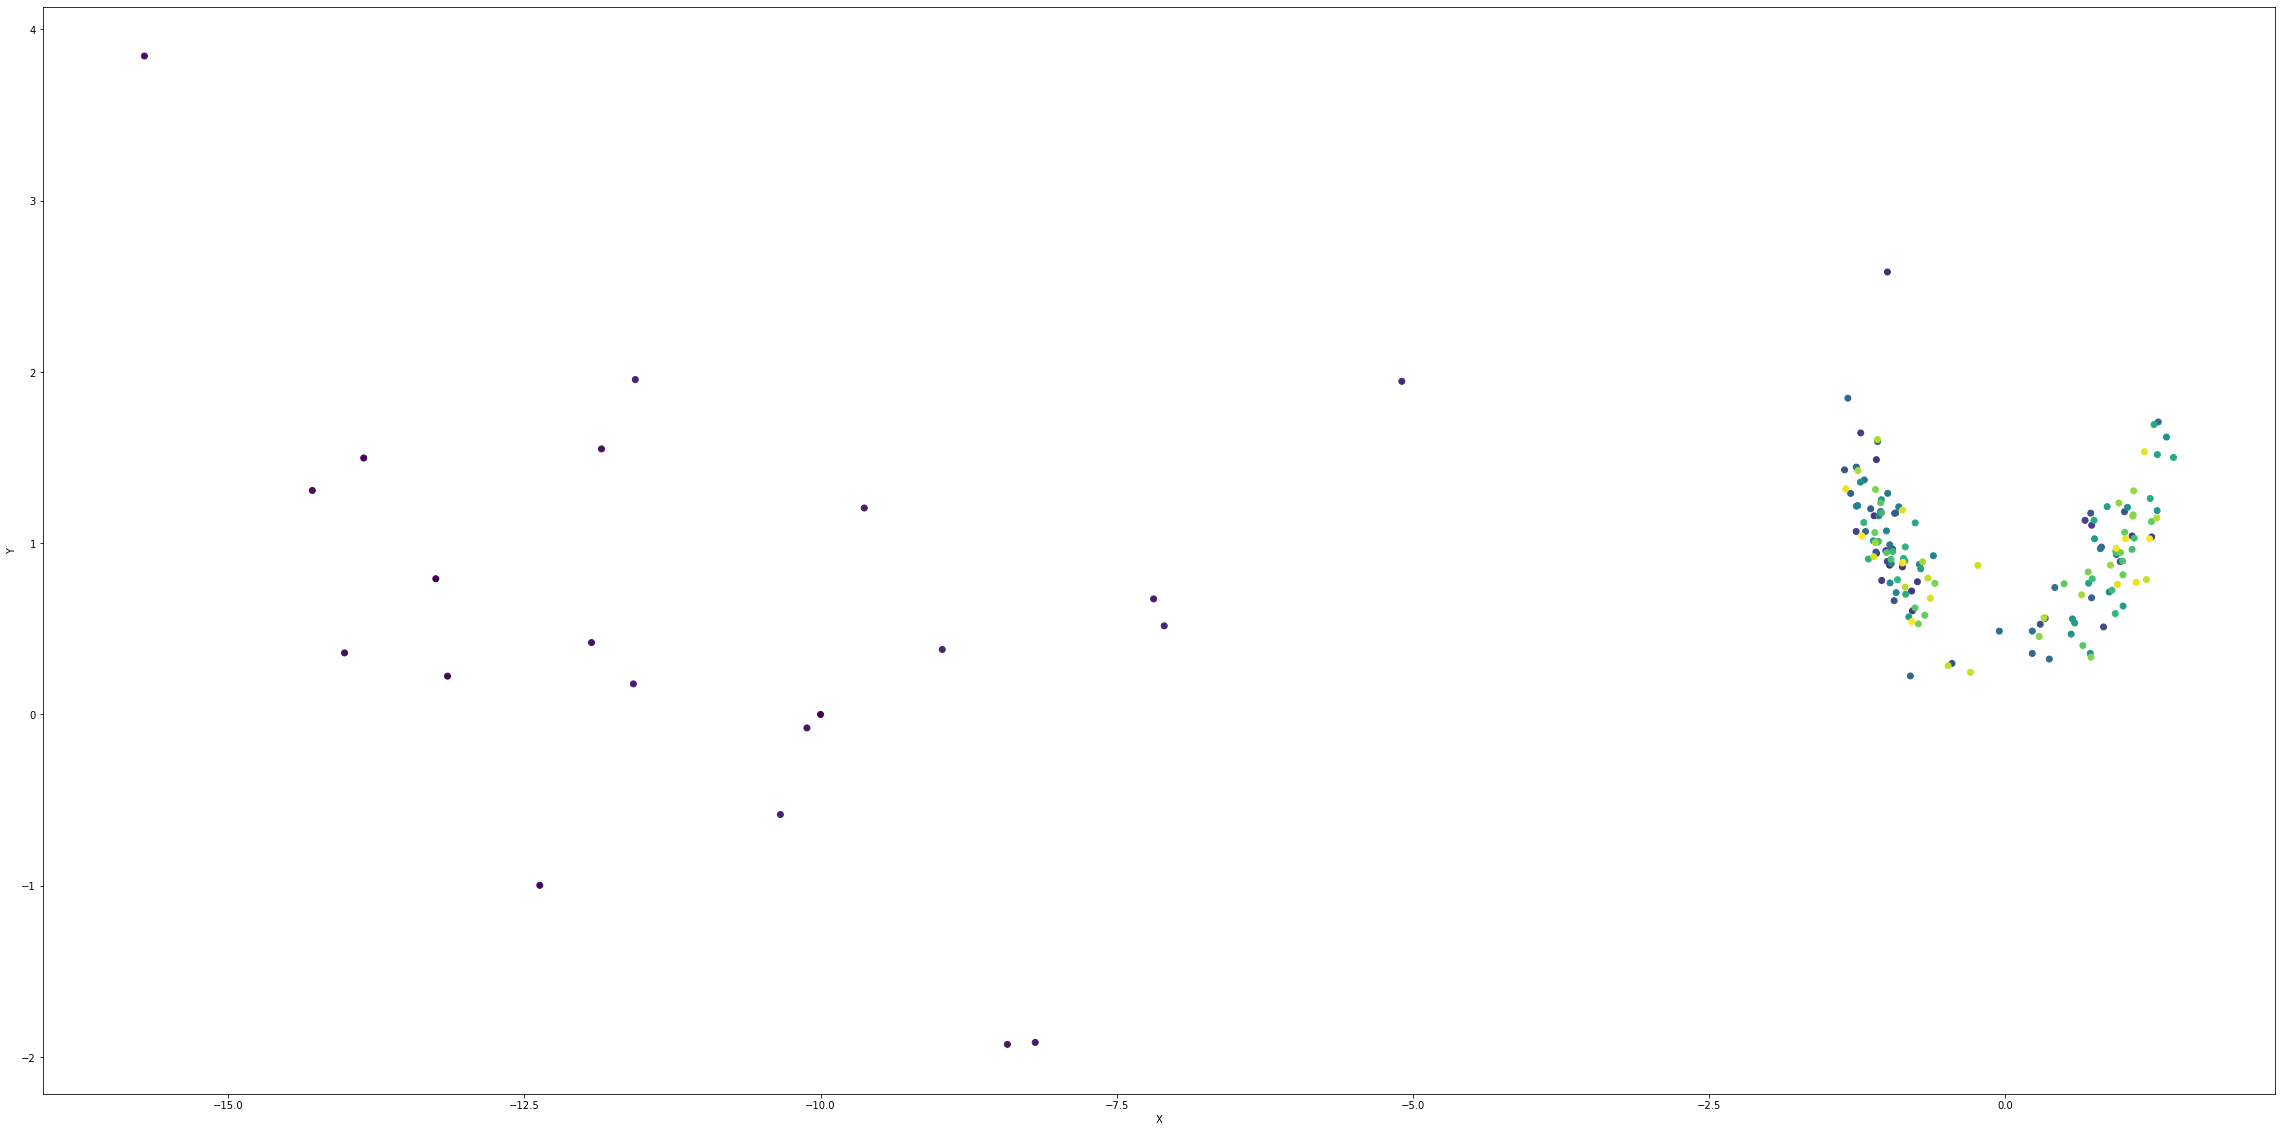

In [159]:
x = [s[0] for s in samples]
y = [s[1] for s in samples]
sample_chosen_index = [i for i in range(len(samples))]

print(len(sample_chosen_index))

fig, ax = plt.subplots(figsize=(40, 20))
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.scatter(x,y,c=sample_chosen_index)


5001


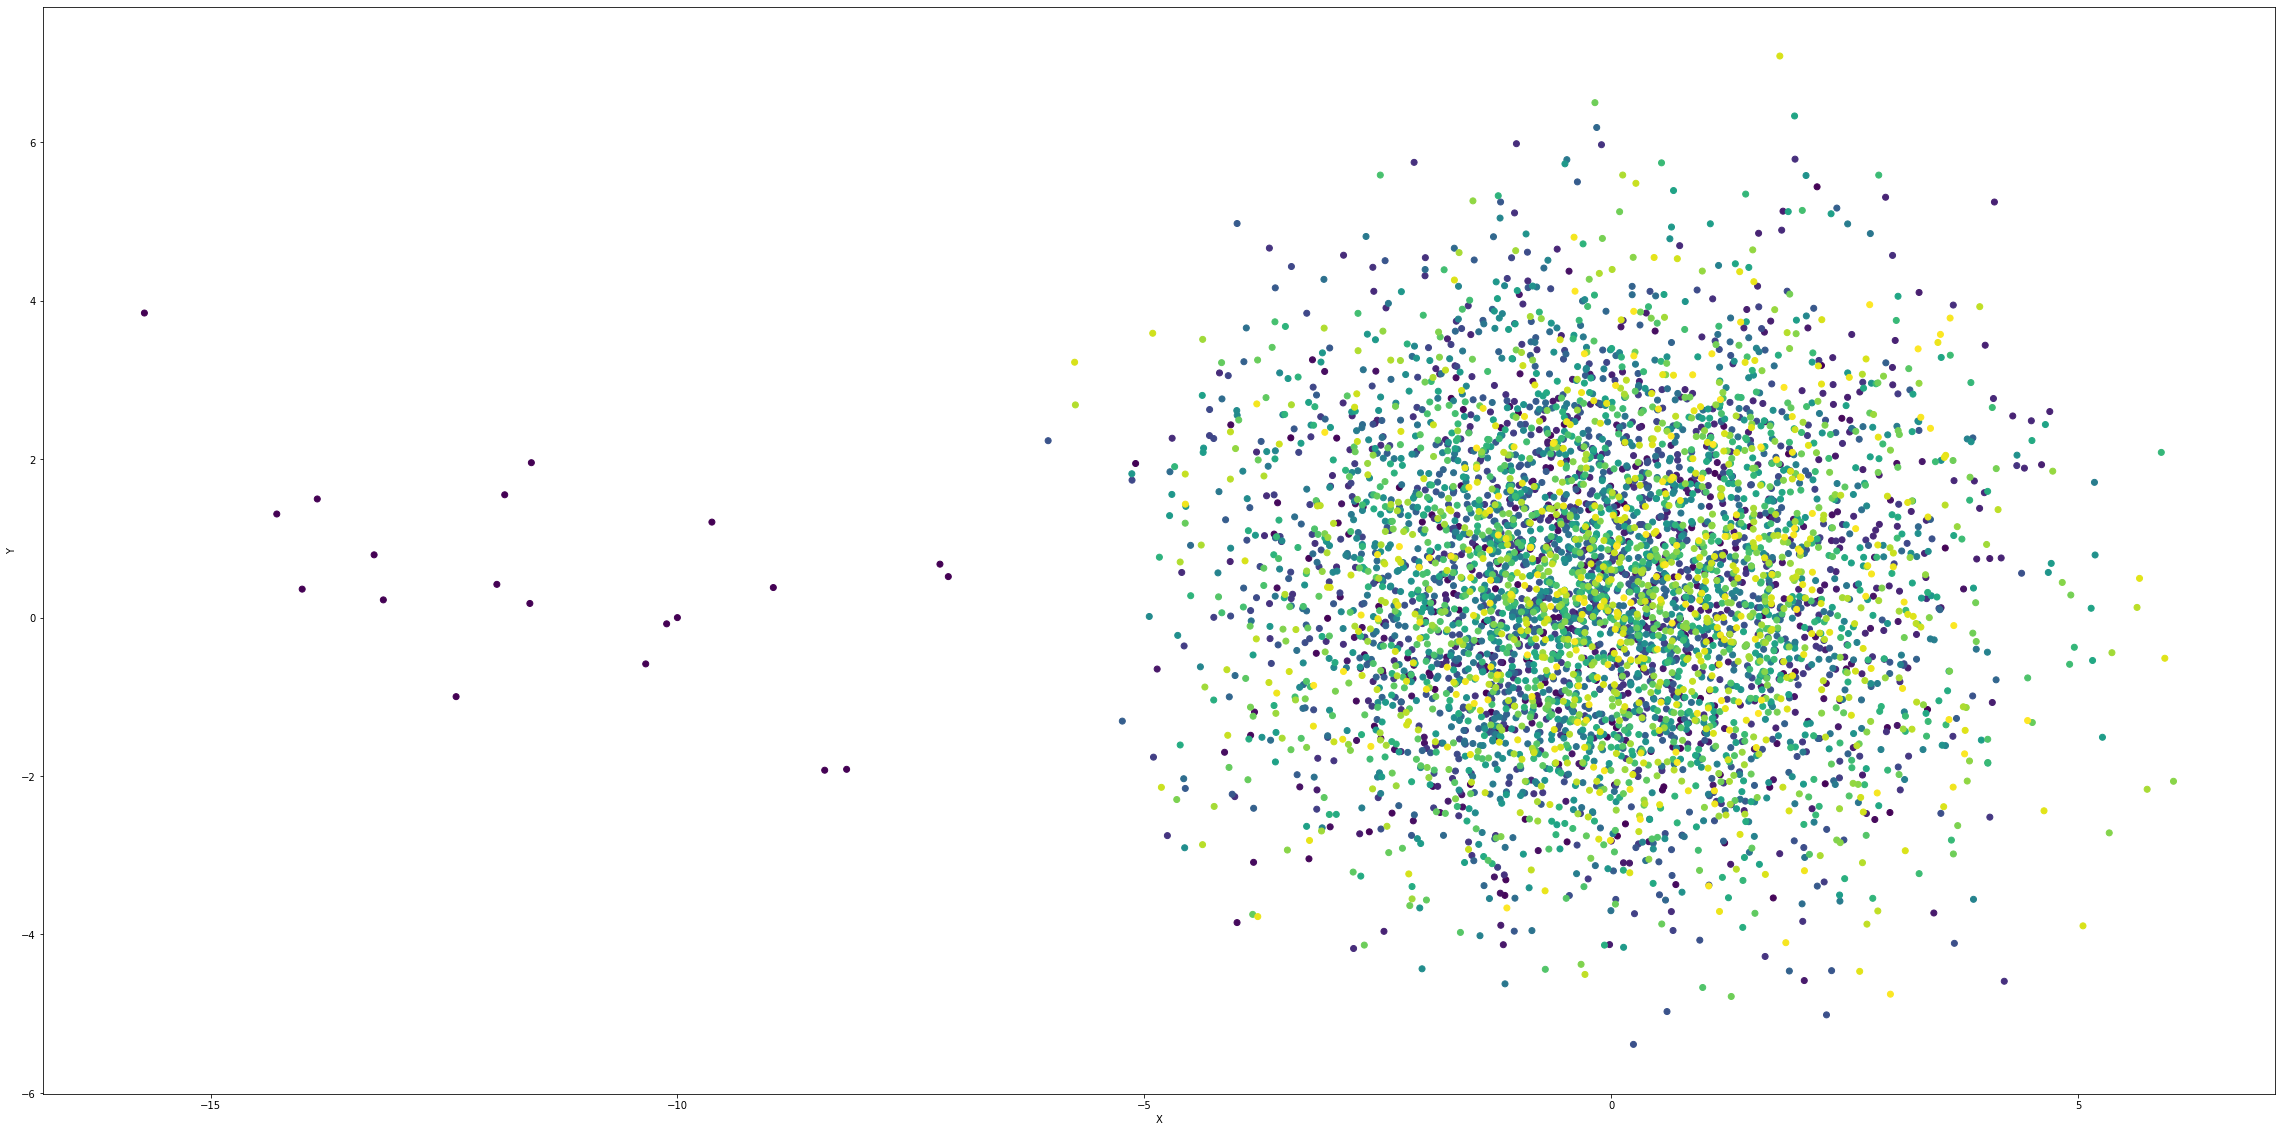

In [160]:
x_all = [s[0] for s in all_samples]
y_all = [s[1] for s in all_samples]
sample_index = [i for i in range(len(all_samples))]

print(len(sample_index))

fig, ax = plt.subplots(figsize=(40, 20))
ax.set_ylabel('Y')
ax.set_xlabel('X')
ax.scatter(x_all,y_all,c=sample_index)

## 1.6 Explore proposal densities (pCN and random walk) with different $\beta$ values

In [43]:
def proposed_density_pCN(u_t, beta):
    # Ask about what C_0 would be in our case
    return stats.norm([np.sqrt(1-beta**2)*u_t],[2*beta**2])

In [35]:
#First find a beta for pCN
beta_s = [x/10 for x in range(10)]
list_a_p = []
N = 1000 

for beta in beta_s:
    average_acceptance_probabity = expected_value_sampling(MH_A_1D(beta,N,proposed_density_pCN)[1])
    list_a_p.append(average_acceptance_probabity)

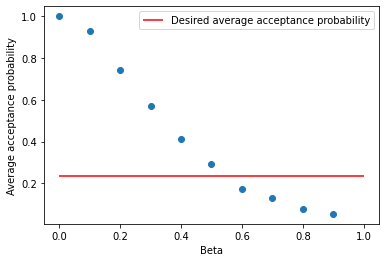

In [36]:
fig, ax = plt.subplots()
plt.scatter(beta_s,list_a_p)
ax.hlines(.234, 0, 1, "r",label = "Desired average acceptance probability")
ax.set_ylabel('Average acceptance probability')
ax.set_xlabel('Beta')
ax.legend()

In [37]:
# Get value of beta that is closest to alpha = 0.234

diff = 10
index = 0 

for i in range(len(list_a_p)):
    if diff > abs(list_a_p[i]-0.234):
        diff = abs(list_a_p[i]-0.234)
        index = i 

print("Index of beta:{}, Beta value:{}, Value of alpha at this value of Beta:{}".format(index, beta_s[index], list_a_p[index]))

Index of beta:5, Beta value:0.5, Value of alpha at this value of Beta:0.29225387556911275


In [15]:
#Compare the asymptotic variance for the 2 estimators
N_s = [i for i in range(100,4000,100)]
variances_pCN = []
variances_RW = []

for N in N_s:
    asymp_var = asymptotic_variance(MH_A_1D(2.1,N,proposed_density_random_walk)[0])
    var_estimator = asymp_var/N
    variances_RW.append(var_estimator)

for N in N_s:
    asymp_var = asymptotic_variance(MH_A_1D(0.5,N,proposed_density_pCN)[0])
    var_estimator = asymp_var/N
    variances_pCN.append(var_estimator)

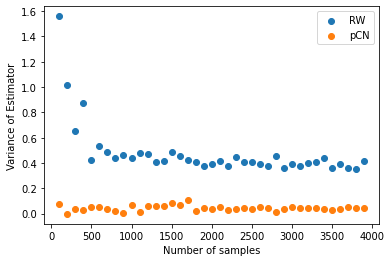

In [38]:
fig, ax = plt.subplots()
plt.scatter(N_s, variances_RW, label = "RW")
plt.scatter(N_s, variances_pCN, label = "pCN")

ax.set_ylabel('Variance of Estimator')
ax.set_xlabel('Number of samples')
ax.legend()

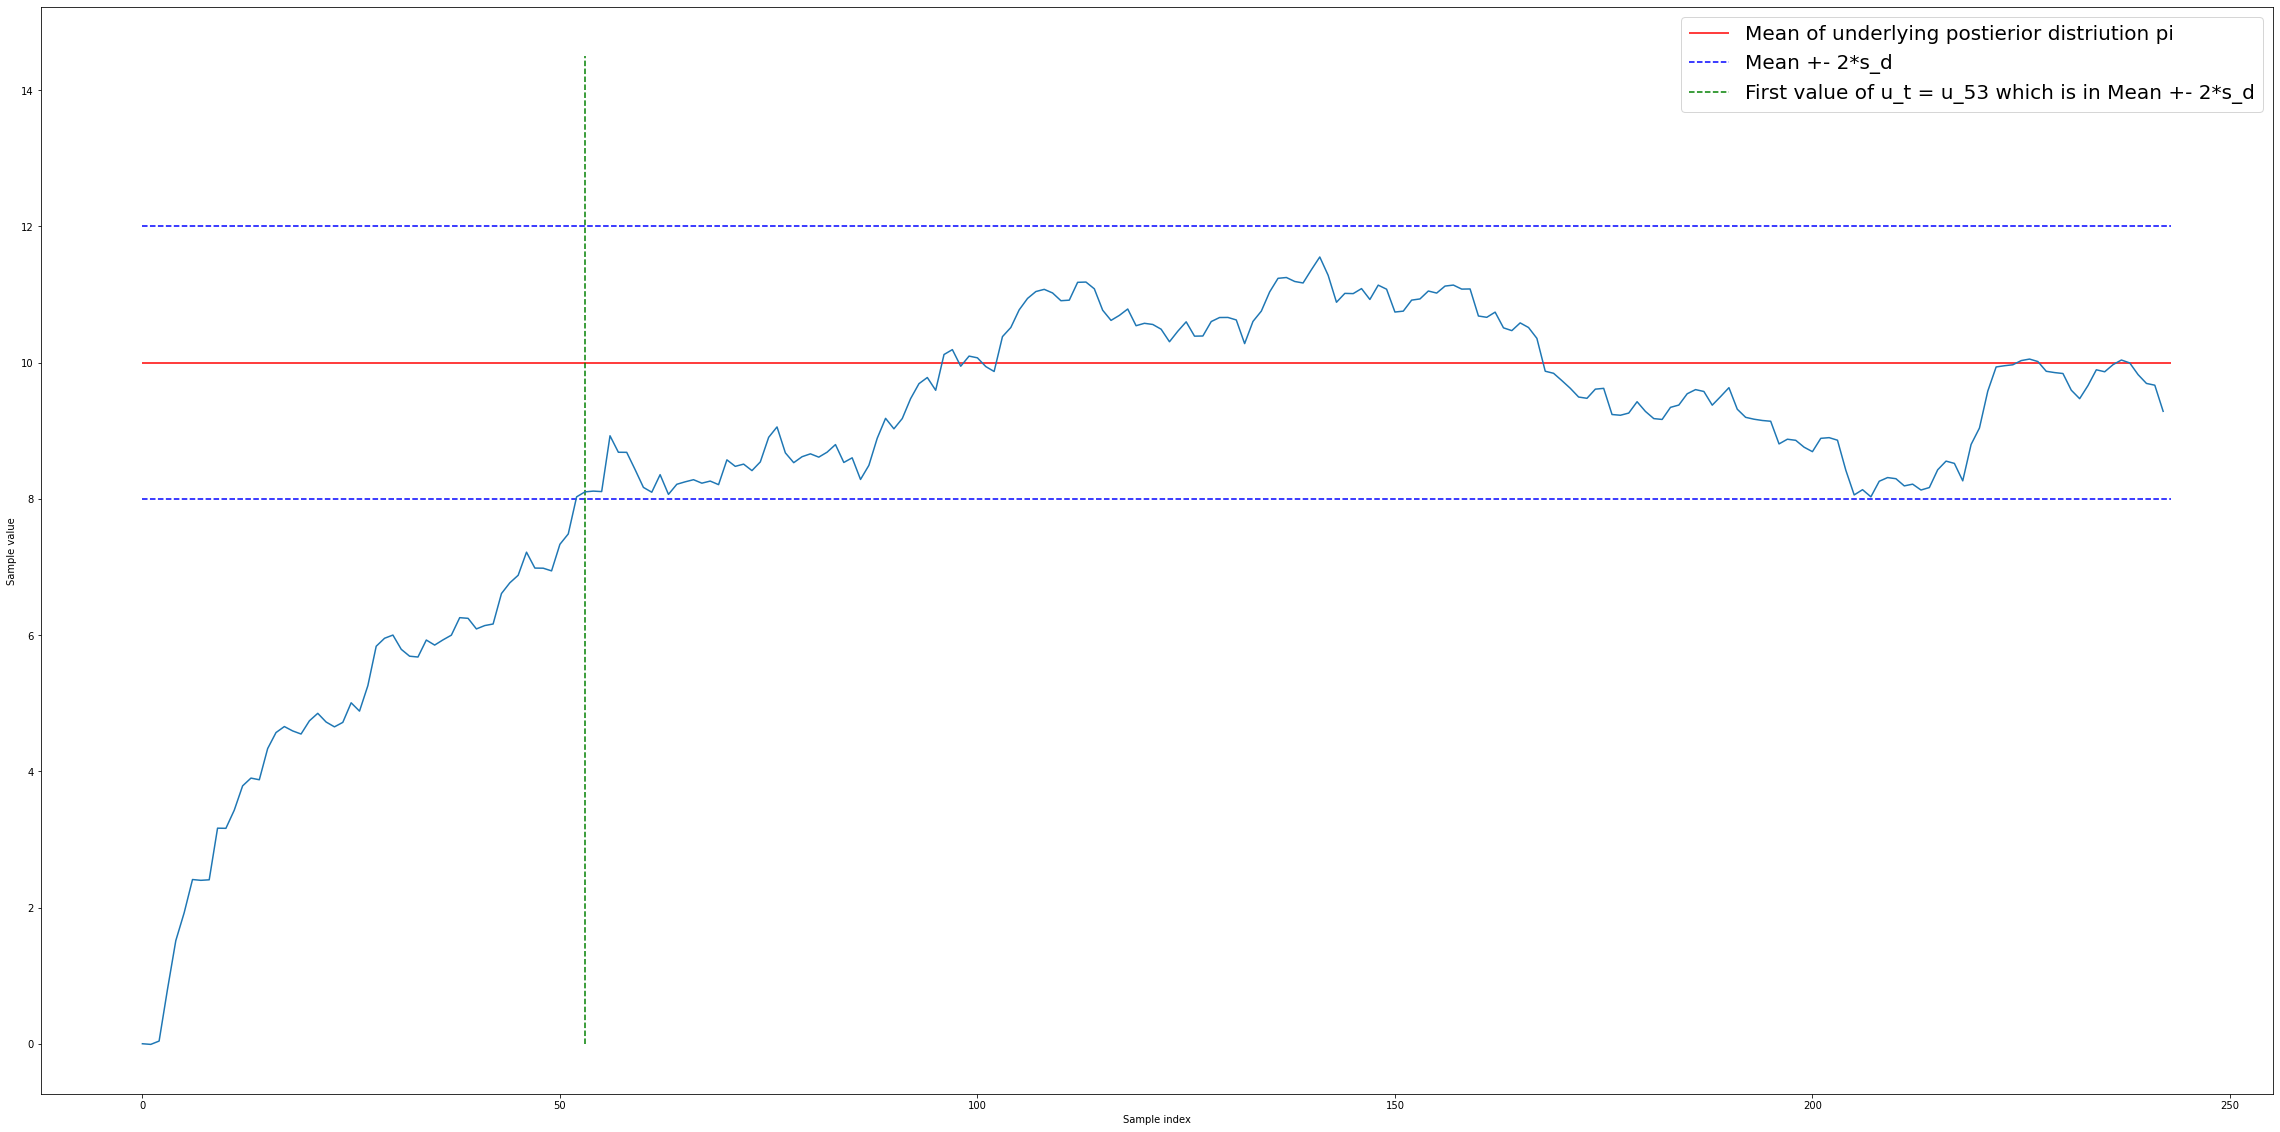

In [74]:
#Burn in for pCN
samples = MH_A_1D(.5,25000,proposed_density_pCN)[0]
sample_index = [i for i in range(len(samples))]

fig, ax = plt.subplots(figsize=(40, 20))
plt.plot(sample_index,samples)
mean = 10
s_d = 1
index = 0 

ax.hlines(mean, 0, len(samples), "r",label = "Mean of underlying postierior distriution pi")
ax.hlines(mean-2*s_d, 0, len(samples), "b",'--',label = "Mean +- 2*s_d")
ax.hlines(mean+2*s_d, 0, len(samples), "b",'--')

for u in samples:
    index+=1
    if(u > mean-2*s_d):
        break

ax.vlines(index, 0, 14.5, "g",'--',label = "First value of u_t = u_{} which is in Mean +- 2*s_d".format(index))
ax.set_ylabel('Sample value')
ax.set_xlabel('Sample index')
ax.legend(prop={'size': 20})

In [54]:
samples = MH_A_1D(.5,5000,proposed_density_pCN)[0]
sample_index = [i for i in range(len(samples))]

In [55]:
expected_value_sampling(samples)

4.8065092377634855

## 2 -  Non reversible metropolis hastings algorithms

In [ ]:
# smaller asymptotic variance for non-reversible

In [95]:
def Non_Reversible_MH_A(beta,N):
    """
    Implementation of Metropolis Hastings Algorithm for 1D distributions.
    
    1. Choose u(1) with π(u(1))>0.
    2. At state u(t), sample a proposal u′ from density q(u′|u(t)).
    3. Accept sample u′ with probability:
        α(u′|u(i)) = min(1,π(u′)q(u(t)|u′)/π(u(i))q(u′|u(t))).
        
    Inputs:
    beta (float) = beta used in random walk proposed density
    N (Int) = Number of steps taken in algorthim
    
    """
    # initalize
    u_0 = 0 
    u_t = 0
    posterior_distribution_pi = stats.norm([10],[1])
    u_samples = [u_0]
    list_acceptance_probaility = []
    
    rv_z = np.random.uniform(0,1,1)
    z = 0 
    if rv_z < 0.5:
        z = 1
    else:
        z = -1
        
    a = beta
    
    # zi=yi+γ·yip,γ∼Γ(α,β);
    
    for t in range(N):
        
        if z > 0: 
        
            # sample a proposal u′ from density f(u′|u(t))
            gamma_distribution = stats.gamma(a)
            u_prime = u_t + gamma_distribution.rvs()

            # π(u′)g(u(t)|u′)
            numerator = posterior_distribution_pi.pdf(u_prime)*gamma_distribution_prime.pdf(u_t)
            
            # π(u(t))f(u′|u(t))
            denominator = posterior_distribution_pi.pdf(u_t)*gamma_distribution_t.pdf(u_prime)

            acceptance_probaility = float(min([1,numerator/denominator]))
            list_acceptance_probaility.append(acceptance_probaility)
        
        else:
            
            # sample a proposal u′ from density g(u′|u(t))
            gamma_distribution = stats.gamma(a)
            u_prime = u_t - gamma_distribution.rvs()
            
            # π(u′)f(u(t)|u′)
            numerator = posterior_distribution_pi.pdf(u_prime)*gamma_distribution_prime.pdf(u_t)
            
            # π(u(t))g(u′|u(t))
            denominator = posterior_distribution_pi.pdf(u_t)*gamma_distribution_t.pdf(u_prime)

            acceptance_probaility = float(min([1,numerator/denominator]))
            list_acceptance_probaility.append(acceptance_probaility)
        
        rv = np.random.uniform(0,1,1)
        
        if rv <= acceptance_probaility:
            #Accept
            u_t = u_prime
            u_samples.append(u_t)
            z = z 
        else:
            #Reject
            u_t = u_t
            z = -1*z
        print(t)
    
    #?Buring what percentage of samples?
    #Burn first 20 percent of samples because we pick a random u_0 which could be very far from where we want to sample from
    return u_samples , list_acceptance_probaility

In [108]:
#Create distribution 
a = 1
distribution = stats.gamma(a)

#GET A RV
rv = distribution.rvs(10)

#EVALUATE THE PDF OF THIS RV AT THE DISTRIBUTION
evaluate = distribution.pdf(rv)

rv, evaluate, distribution.stats()

(array([1.58977027, 2.17070871, 1.68409383, 3.43115576, 1.87938603,
        2.13229054, 1.52960341, 0.46754961, 0.03806991, 2.00112721]),
 array([0.20397246, 0.11409673, 0.18561255, 0.03234953, 0.15268382,
        0.1185654 , 0.21662156, 0.62653564, 0.96264564, 0.13518282]),
 (array(1.), array(1.)))

In [97]:
u_samples , list_acceptance_probaility = Non_Reversible_MH_A(0,5000)

UnboundLocalError: local variable 'gamma_distribution_t' referenced before assignment

In [94]:
u_samples

[0]